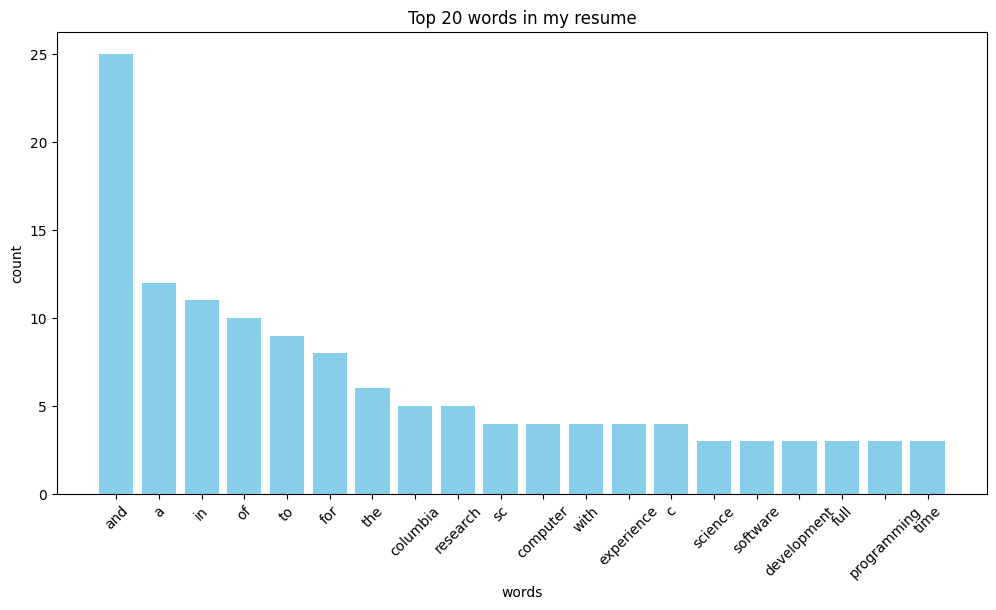

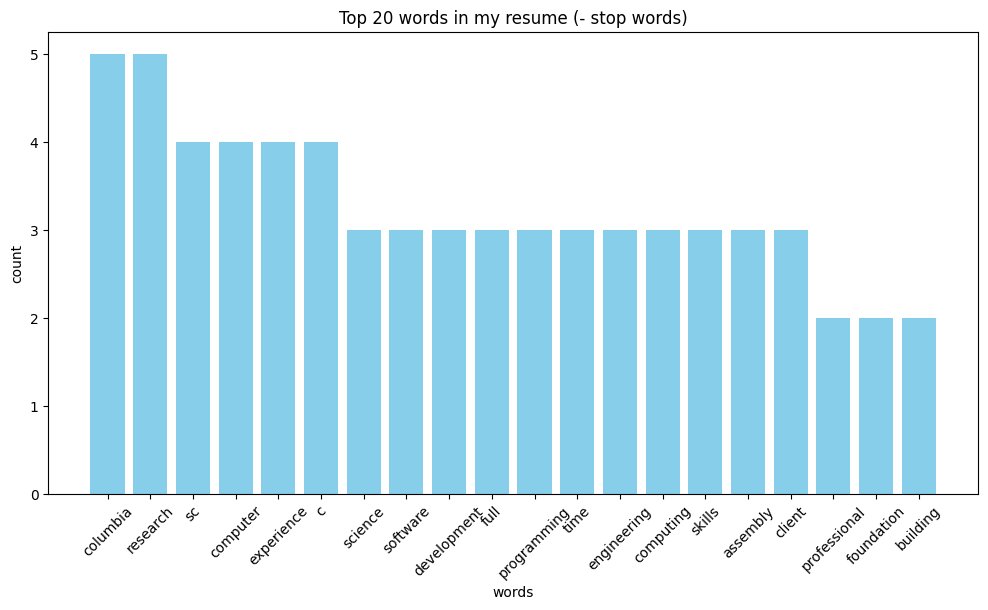

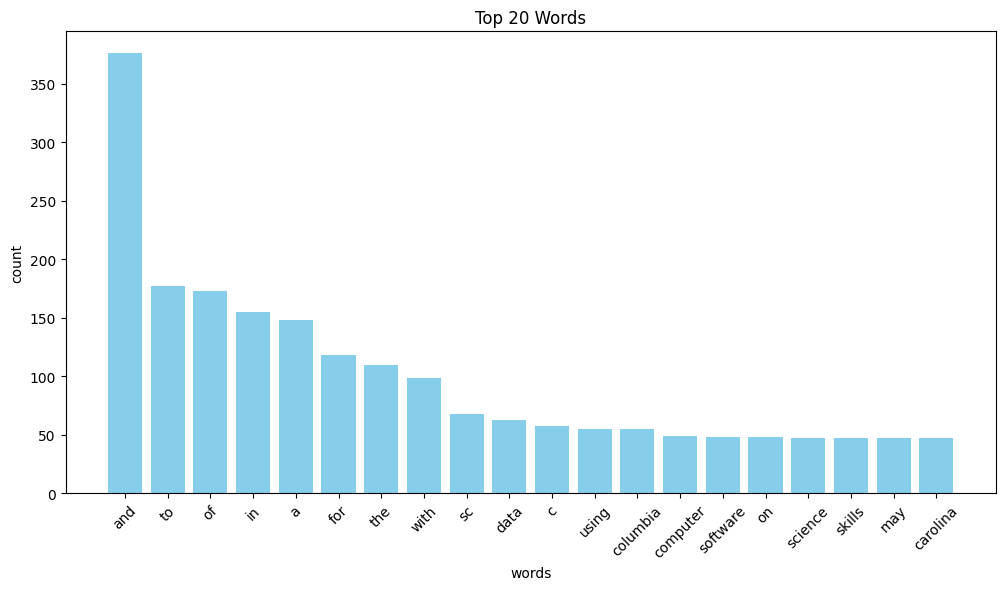

In [ ]:
import fitz
import os
import re
from collections import Counter
import matplotlib.pyplot as plt

# Saves filepath of resume PDF
resumePath = r"Quiz1\Resumes\James Tabakian Resume 2025 (1) (1).pdf"
resumeFolderPath = r"C:\Users\ataba\Documents\CSCE-580\Quiz1\Resumes"
stopWordsPath = r"C:\Users\ataba\Documents\CSCE-580\Quiz1\NLTK's list of english stopwords"
fullPath = os.path.join(os.getcwd(), resumePath)

def plot_top_words(words_list, title="Top 20 Words", xlable = "words", ylable="count"):

    # Count word frequencies
    word_counts = {}
    for word in words_list:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    # Sort and get top 20
    top20 = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:20]

    # Separate words and counts
    words = [w for w, _ in top20]
    counts = [c for _, c in top20]

    # Plot
    plt.figure(figsize=(12,6))
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.xticks(rotation=45)
    plt.show()

# Removes stop words from a list of words
def remove_stop_words(word_list, stop_words):
    filtered_words = [w for w in word_list if w.lower() not in stop_words]   
    return filtered_words

# Opens PDF file and saves words to an array
doc = fitz.open(r"C:\Users\ataba\Documents\CSCE-580\Quiz1\Resumes\James Tabakian Resume 2025 (1) (1).pdf")
text = ""
for page in doc:
   text+=page.get_text()

resume_words = re.findall(r'\b[a-zA-Z]+\b', text.lower())

# Adds stop words from raw file to list of stop words
with open(stopWordsPath, "r", encoding="utf-8") as f:
    stop_words = f.read().splitlines()
specific_words = remove_stop_words(resume_words,stop_words)

plot_top_words(resume_words,"Top 20 words in my resume")
plot_top_words(specific_words,"Top 20 words in my resume (- stop words)")

all_resume_words = []
for file in os.listdir(resumeFolderPath):
    
    file_path = os.path.join(resumeFolderPath, file)
    doc = fitz.open(file_path)
    text = ""
    for page in doc:
        text += page.get_text()
    doc.close()

    # tokenize words (letters only, lowercase)
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    all_resume_words.extend(words)

plot_top_words(all_resume_words, "Top 20 words in my class")
all_spesific_words = remove_stop_words(all_resume_words,stop_words)

plot_top_words(all_spesific_words, "Top 20 words in my class (- stop words)")